# Machine Learning - Credit Card Default

Kaggle project
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

## Exploration Ideas:
1. How does the probability of default payment vary by categories of different demographic variables?
2. Which variables are the strongest predictors of default payment?

3. How much will one default by?

## Process
1. Define the Problem
    - What is the problem? Describe the problem informally and formally and list assumptions and similar problems.
    - Why does the problem need to be solved? List your motivation for solving the problem, the benefits a solution provides and how the solution will be used.
    - How would I solve the problem? Describe how the problem would be solved manually to flush domain knowledge.
2. Prepare Data
    - Data Selection: Consider what data is available, what data is missing and what data can be removed.
        - What is the extent of the data you have available? For example through time, database tables, connected systems. Ensure you have a clear picture of everything that you can use.
        - What data is not available that you wish you had available? For example data that is not recorded or cannot be recorded. You may be able to derive or simulate this data.
        - What data don’t you need to address the problem? Excluding data is almost always easier than including data. Note down which data you excluded and why.
    - Data Preprocessing: Organize your selected data by formatting, cleaning and sampling from it.
    - Data Transformation: Transform preprocessed data ready for machine learning by engineering features using scaling, attribute decomposition and attribute aggregation.
3. Spot Check Algorithms
4. Improve Results
5. Present Results


## Pipeline
1. Extract Data
2. Mine Data (Data Exploration)
3. Transform Data
4. Split Data (Test & Train)
5. Train Model
6. Test Model
7. Repeat

## 0. Setup Notebook Enviornment

In [1]:
%pylab inline
import pandas
import seaborn
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Setup options for display
pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_columns', 500)
pandas.set_option('display.max_colwidth', 500)
pandas.set_option('display.width', 1000)

## 1. Define the Problem

http://machinelearningmastery.com/how-to-define-your-machine-learning-problem/

Problem Definition Framework

I use a simple framework when defining a new problem to address with machine learning. The framework helps me to quickly understand the elements and motivation for the problem and whether machine learning is suitable or not.

The framework involves answering three questions to varying degrees of thoroughness:

 - Step 1: What is the problem?
 - Step 2: Why does the problem need to be solved?
 - Step 3: How would I solve the problem?

## Step 1: What is the problem?

#### Informal description

Describe the problem as though you were describing it to a friend or colleague. This can provide a great starting point for highlighting areas that you might need to fill. It also provides the basis for a one sentence description you can use to share your understanding of the problem.

In [35]:
'''
    I need a program that will tell me what credit cards will default
    I will then want to know how much I'm expected to lose*
    *If this is overly complicated, divide problem into two part solution
'''

#### Formalism

'A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.'

Use this formalism to define the T, P, and E for your problem.

In [36]:
# Task(T) - Classify a credit card that has not defaulted as going to default or not
# Experience (E) - A portfolio of credit cards that have defaulted or not 
# Performance (P) - Classification accuracy, how many defaulted credit cards did we correctly identify

#### Assumptions

Create a list of assumptions about the problem and it’s phrasing. These may be rules of thumb and domain specific information that you think will get you to a viable solution faster.

It can be useful to highlight questions that can be tested against real data because breakthroughs and innovation occur when assumptions and best practice are demonstrated to be wrong in the face of real data. It can also be useful to highlight areas of the problem specification that may need to be challenged, relaxed or tightened.

In [ ]:
# The higher the loan amount, the higher probability the loan will default
# 

### Step 2: Why does the the problem need to be solved?

The second step is to think deeply about why you want or need the problem solved.

## 2. Prepare Data

### Step 1: Select Data

This step is concerned with selecting the subset of all available data that you will be working with. There is always a strong desire for including all data that is available, that the maxim “more is better” will hold. This may or may not be true.

You need to consider what data you actually need to address the question or problem you are working on. Make some assumptions about the data you require and be careful to record those assumptions so that you can test them later if needed.

Below are some questions to help you think through this process:

- What is the extent of the data you have available? For example through time, database tables, connected systems. Ensure you have a clear picture of everything that you can use.
- What data is not available that you wish you had available? For example data that is not recorded or cannot be recorded. You may be able to derive or simulate this data.
- What data don’t you need to address the problem? Excluding data is almost always easier than including data. Note down which data you excluded and why.

It is only in small problems, like competition or toy datasets where the data has already been selected for you.

In [3]:
file = r'C:\Users\jhanl\Documents\Python\Venvs\Sandbox\projects\DS_CreditCardDefault\CreditCardDefault\data\external'
data_file = 'UCI_Credit_Card.csv'
data_filepath = os.path.join(file, data_file)

data_defs_file = 'CreditCardDefault_DataDefinitions.csv'
data_defs_filepath = os.path.join(file, data_defs_file)
data_defs_df = pandas.read_csv(data_defs_filepath)

In [4]:
data_defs_df

,Name,Definition
0,ID,ID of each client
1,LIMIT_BAL,Amount of given credit in NT dollars (includes individual and family/supplementary credit
2,SEX,"Gender (1=male, 2=female)"
3,EDUCATION,"(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)"
4,MARRIAGE,"Marital status (1=married, 2=single, 3=others)"
5,AGE,Age in years
6,PAY_0,"Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)"
7,PAY_2,"Repayment status in August, 2005 (scale same as above)"
8,PAY_3,"Repayment status in July, 2005 (scale same as above)"
9,PAY_4,"Repayment status in June, 2005 (scale same as above)"


In [5]:
data_df = pandas.read_csv(data_filepath)
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Step 2: Preprocess Data

After you have selected the data, you need to consider how you are going to use the data. This preprocessing step is about getting the selected data into a form that you can work.

Three common data preprocessing steps are formatting, cleaning and sampling:

- Formatting: The data you have selected may not be in a format that is suitable for you to work with. The data may be in a relational database and you would like it in a flat file, or the data may be in a proprietary file format and you would like it in a relational database or a text file.
- Cleaning: Cleaning data is the removal or fixing of missing data. There may be data instances that are incomplete and do not carry the data you believe you need to address the problem. These instances may need to be removed. Additionally, there may be sensitive information in some of the attributes and these attributes may need to be anonymized or removed from the data entirely.
- Sampling: There may be far more selected data available than you need to work with. More data can result in much longer running times for algorithms and larger computational and memory requirements. You can take a smaller representative sample of the selected data that may be much faster for exploring and prototyping solutions before considering the whole dataset.

It is very likely that the machine learning tools you use on the data will influence the preprocessing you will be required to perform. You will likely revisit this step.

## Step 3: Transform Data

The final step is to transform the process data. The specific algorithm you are working with and the knowledge of the problem domain will influence this step and you will very likely have to revisit different transformations of your preprocessed data as you work on your problem.

Three common data transformations are scaling, attribute decompositions and attribute aggregations. This step is also referred to as feature engineering.

- Scaling: The preprocessed data may contain attributes with a mixtures of scales for various quantities such as dollars, kilograms and sales volume. Many machine learning methods like data attributes to have the same scale such as between 0 and 1 for the smallest and largest value for a given feature. Consider any feature scaling you may need to perform.
- Decomposition: There may be features that represent a complex concept that may be more useful to a machine learning method when split into the constituent parts. An example is a date that may have day and time components that in turn could be split out further. Perhaps only the hour of day is relevant to the problem being solved. consider what feature decompositions you can perform.
- Aggregation: There may be features that can be aggregated into a single feature that would be more meaningful to the problem you are trying to solve. For example, there may be a data instances for each time a customer logged into a system that could be aggregated into a count for the number of logins allowing the additional instances to be discarded. Consider what type of feature aggregations could perform.

You can spend a lot of time engineering features from your data and it can be very beneficial to the performance of an algorithm. Start small and build on the skills you learn.

### Considerations:
    - Aggregate education 0,4,5,6 into one bucket

In [9]:
## Decribe data - Let's start to figure out what we're dealing with
data_df.describe() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


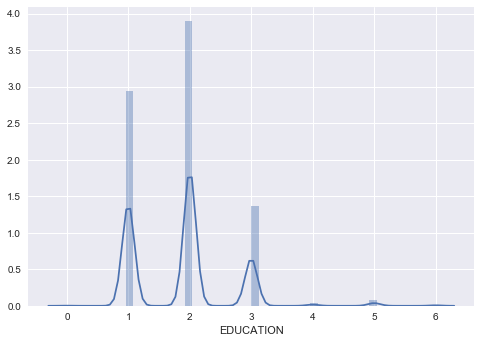

In [34]:
graph_feature = 'EDUCATION'
#Distribution Plot
seaborn.distplot(
    data_df[graph_feature]
)

In [10]:
#Baseline Probability
numpy.mean(data_df['default.payment.next.month'])

0.22120000000000001

In [12]:
data_df.corr()['default.payment.next.month']

ID                           -0.013952
LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default.payment.next.month    1.000000
Name: default.payment.nex

In [29]:
#Class Probability
feature_class = 'AGE'
class_prob_df = data_df[
    [feature_class
     ,'default.payment.next.month']
].groupby(feature_class).agg(
    {'default.payment.next.month': [np.mean, np.size]
    }).reset_index()
class_prob_df
class_prob_df.columns.get_level_values(0)

MultiIndex(levels=[['default.payment.next.month', 'AGE'], ['mean', 'size', '']],
           labels=[[1, 0, 0], [2, 0, 1]])

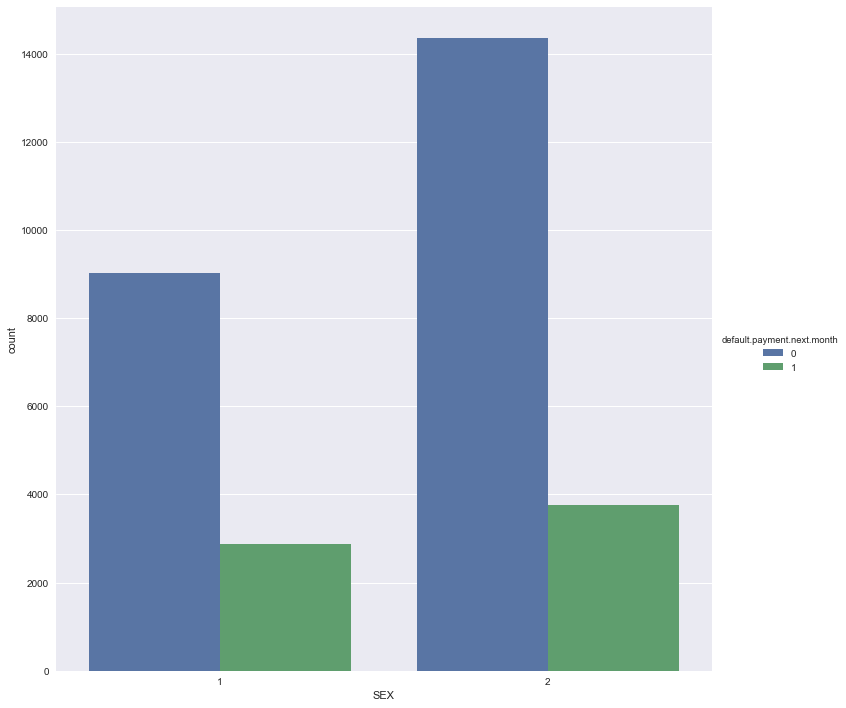

In [13]:

dependent_var = 'SEX'
#seaborn.distplot(cc_df['SEX'])
seaborn.factorplot(
    data = data_df
    ,x = dependent_var 
    ,hue = 'default.payment.next.month'
    ,kind = 'count'
    ,size = 10
)
#cc_df.describe()
#cc_df.corr()

## 4. Split Data

## 5. Train Model

## 6. Test Model